## SHOPPING DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./DATA/shopping.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [4]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

### Check null values

In [6]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

### EDA

### Univariate Analysis

In [7]:
def dist_box(data):
    """
    function plots a combined graph for univariate analysis of 
    continous variable to check spread, central tendency, dispersion and outliers  
    """
    Name=data.name.upper()
    fig,(ax_box,ax_dis) = plt.subplots(2,1,gridspec_kw = {"height_ratios": (.25, .75)},figsize=(8, 5))
    
    mean=data.mean()
    median=data.median()
    mode=data.mode().tolist()[0]
    
    fig.suptitle("SPREAD OF DATA FOR "+ Name  , fontsize=18, fontweight='bold')
    sns.boxplot(x=data,showmeans=True, orient='h',color="violet",ax=ax_box)
    ax_box.set(xlabel='')
    
    sns.distplot(data,kde=False,color='blue',ax=ax_dis)
    ax_dis.axvline(mean, color='r', linestyle='--',linewidth=2)
    ax_dis.axvline(median, color='g', linestyle='-',linewidth=2)
    ax_dis.axvline(mode, color='y', linestyle='-',linewidth=2)
    
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})

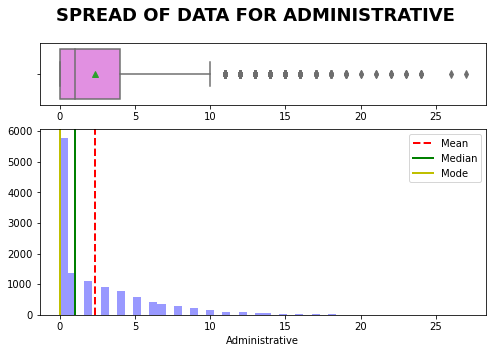

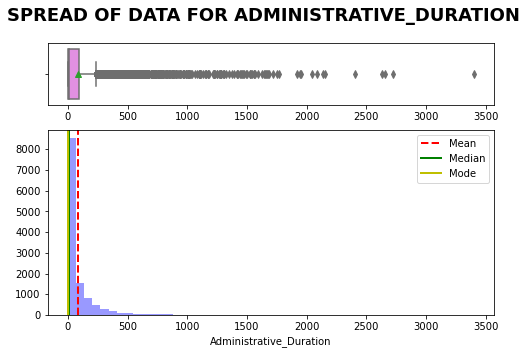

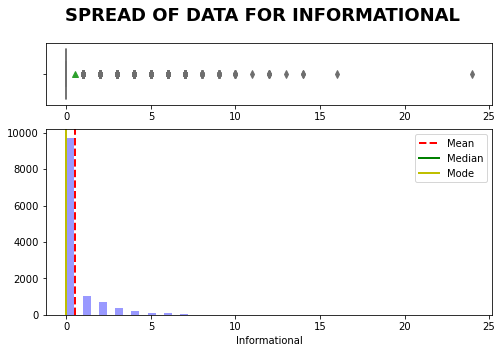

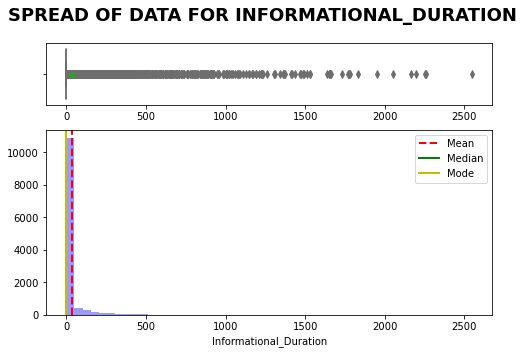

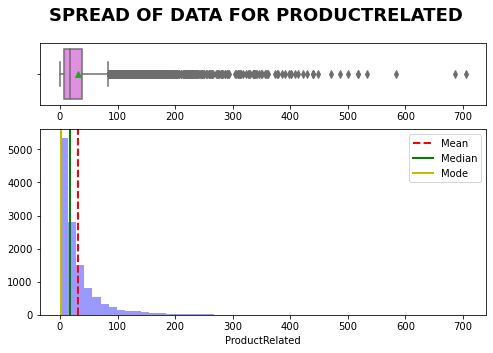

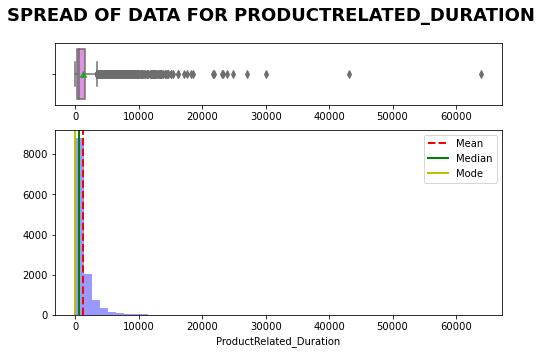

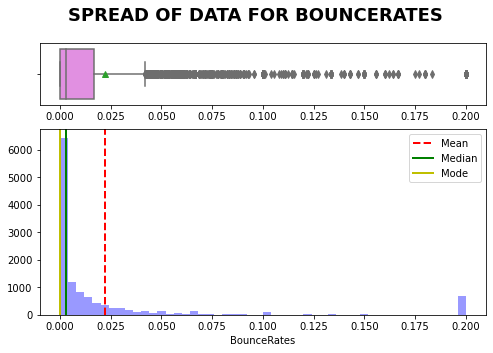

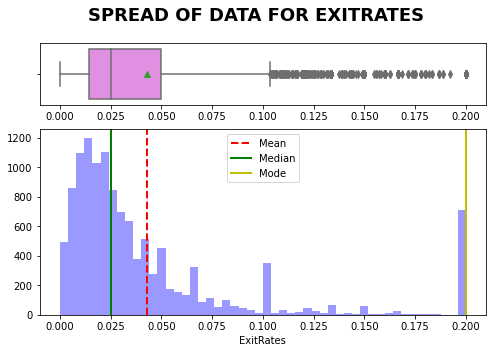

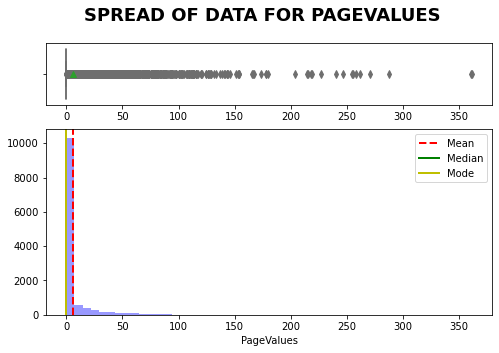

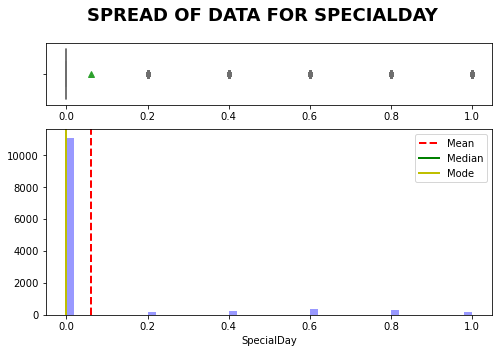

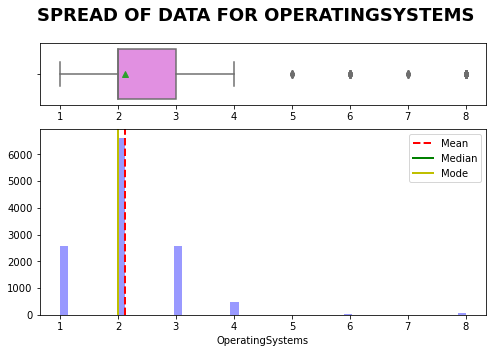

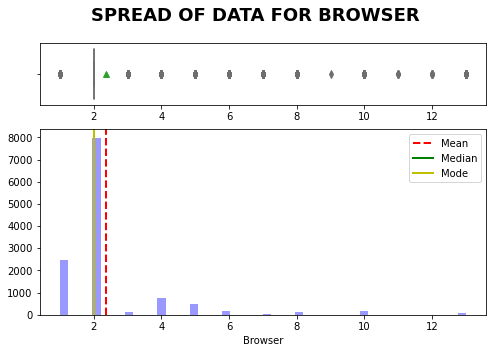

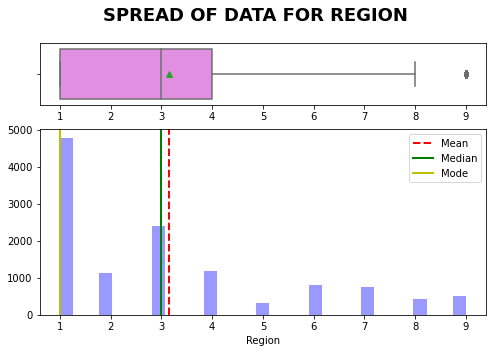

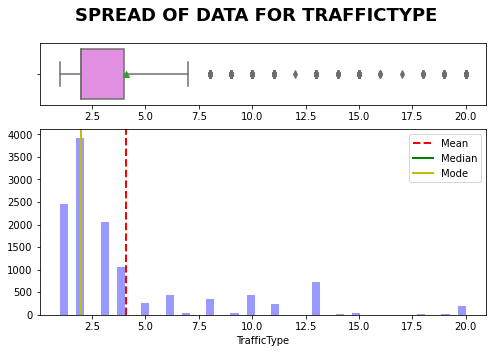

In [8]:
#distribution of numericla columns
list_col = df.select_dtypes(['int64','float64']).columns
for i in range(len(list_col)):
    dist_box(df[list_col[i]])

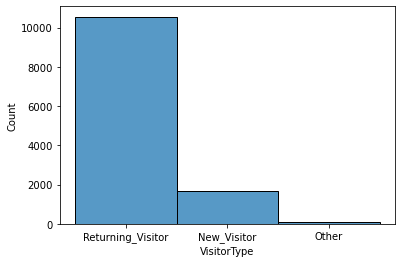

In [11]:
sns.histplot(data=df, x="VisitorType")
plt.show()

- There are more number of Returning_visitors in visitor types

### Correlation Analysis

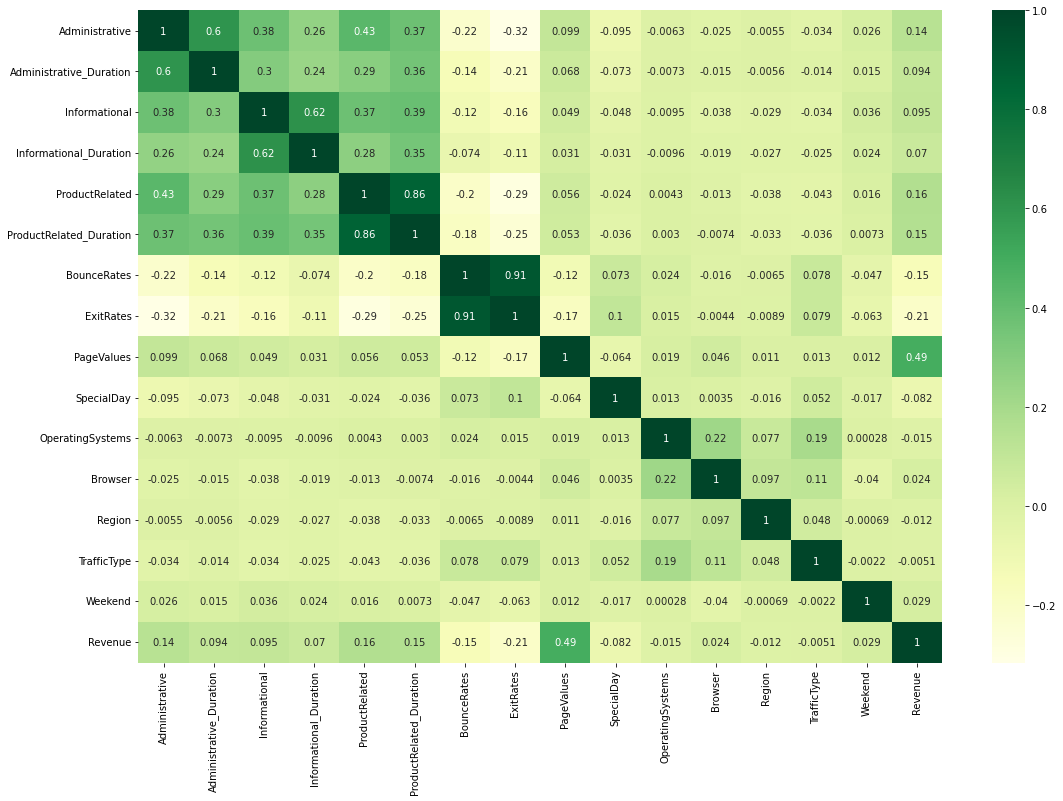

In [9]:
plt.figure(figsize=(18,12))
sns.heatmap(df.corr(),
            annot=True ,
            cmap="YlGn" 
           )
plt.show()

<u>From the above correlation map:</u><br>
    1. **Administrative** and **Administrative_Duration** have high correlation<br>
    2. **Informational** and **Informational_Duration** have high correlation<br>
    3. **ProductRelated** and **ProductRelated_Duration** have high correlation<br>
    4. **Revenue** and **PageValueshave** high correlation<br>

In [14]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

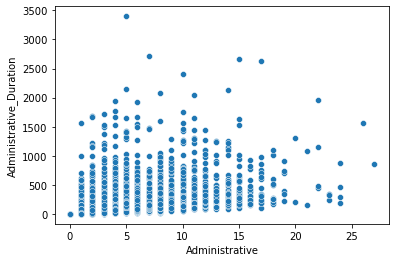

In [21]:
#check correlation distribution in adminstrative category 
sns.scatterplot(x = df['Administrative'], y= df['Administrative_Duration'])
plt.show()

- for each number of page visits the user spent significant amount of time

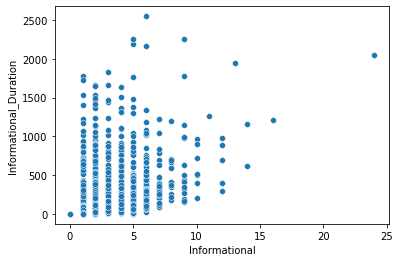

In [16]:
#check correlation distribution in Informational category 
sns.scatterplot(x = df['Informational'], y= df['Informational_Duration'])
plt.show()

- up to less than 10 page visits the user spent significant amount of time

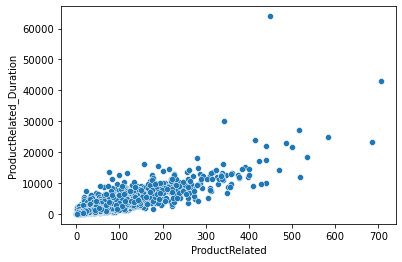

In [19]:
#check correlation distribution in productrelated category 
sns.scatterplot(x = df['ProductRelated'], y= df['ProductRelated_Duration'])
plt.show()

- we can see the user spent most of the time at less than 300 page visits

In [33]:
df["Administrative"].value_counts()

0     5768
1     1354
2     1114
3      915
4      765
5      575
6      432
7      338
8      287
9      225
10     153
11     105
12      86
13      56
14      44
15      38
16      24
17      16
18      12
19       6
24       4
22       4
23       3
21       2
20       2
27       1
26       1
Name: Administrative, dtype: int64

In [34]:
df["Informational"].value_counts()

0     9699
1     1041
2      728
3      380
4      222
5       99
6       78
7       36
9       15
8       14
10       7
12       5
14       2
16       1
11       1
24       1
13       1
Name: Informational, dtype: int64

In [35]:
df["ProductRelated"].value_counts()

1      622
2      465
3      458
4      404
6      396
      ... 
243      1
409      1
262      1
414      1
192      1
Name: ProductRelated, Length: 311, dtype: int64

In [29]:
adf = df[['Administrative', 'Administrative_Duration',
           'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
           'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
           'Weekend', 'Revenue']]
adf.head()

,Administrative,Administrative_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Summarize page views, durations, and bounce/exit rates for each page category.

### Administrative

In [30]:
gadf = adf[['Administrative', 'Administrative_Duration','BounceRates', 'ExitRates']].groupby("Administrative").agg(["sum", "mean"]).reset_index()
gadf.columns = ["_".join(i) for i in gadf.columns]
gadf_rename_cols = {'Administrative_':"administrative",
                    'Administrative_Duration_sum': "total_admdur",
                    'Administrative_Duration_mean': "avg_admdur", 
                    'BounceRates_sum':"total_br", 
                    'BounceRates_mean':"avg_br",
                    'ExitRates_sum':"total_er", 
                    'ExitRates_mean':"avg_er"}
gadf.rename(columns = gadf_rename_cols, inplace = True)
gadf.head()

,administrative,total_admdur,avg_admdur,total_br,avg_br,total_er,avg_er
0,0,0.000000,0.000000,223.573944,0.038761,377.096170,0.065377
1,1,57542.423901,42.498097,14.310456,0.010569,39.081812,0.028864
2,2,96051.216248,86.221918,9.368938,0.008410,29.482436,0.026465
3,3,106785.191627,116.705127,6.462086,0.007062,21.272303,0.023248
4,4,113158.591194,147.919727,4.935946,0.006452,16.906143,0.022100


In [31]:
gadf[gadf["avg_admdur"]==gadf["avg_admdur"].max()][["administrative","total_admdur", "avg_admdur"]].reset_index(drop = True)

,administrative,total_admdur,avg_admdur
0,26,1561.717567,1561.717567


In [32]:
gadf[gadf["avg_br"]==gadf["avg_br"].max()][["administrative","total_admdur", "avg_br"]].reset_index(drop = True)

,administrative,total_admdur,avg_br
0,0,0.0,0.038761


In [33]:
gadf[gadf["avg_er"]==gadf["avg_er"].max()][["administrative","total_admdur", "avg_er"]].reset_index(drop = True)

,administrative,total_admdur,avg_er
0,0,0.0,0.065377


In [34]:
gadf[gadf["total_admdur"]==gadf["total_admdur"].max()].reset_index(drop = True)

,administrative,total_admdur,avg_admdur,total_br,avg_br,total_er,avg_er
0,4,113158.591194,147.919727,4.935946,0.006452,16.906143,0.0221


### Summary of Admimistrative Category

- For the **Highest Average Administrative_Duration**, The total number of **Adminitrative page views** are **26**.

- For the **Highest Average BounceRates**, The total number of **Adminitrative page views** are **0**.

- For the **Highest Average ExitRates**, The total number of **Adminitrative page views** are **0**.


- For the **Highest Administrative_Duration (113158.59119427)**:
     - administrative pageviews: 4 
     - avg_Administrative_Duration: 147.91
     - total_BounceRates: 4.93
     - avg_BounceRates: 0.0064
     - total_ExitRates: 16.90
     - avg_ExitRates: 0.022

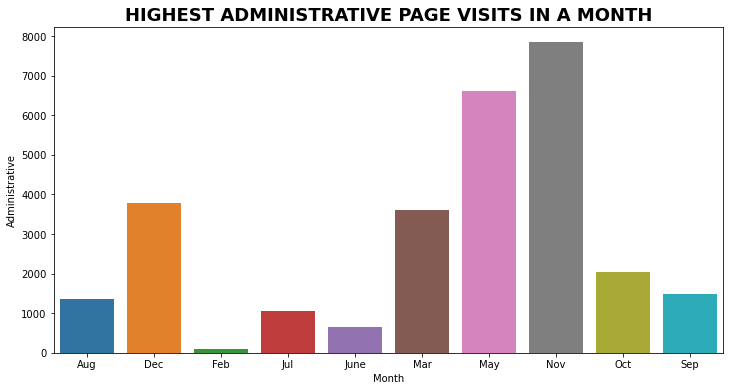

In [35]:
gadm = adf[['Administrative','Month']].groupby("Month").sum("Administrative").reset_index()
# gadm[gadm["Administrative"] ==gadm["Administrative"].max()]

plt.figure(figsize=(12,6))
sns.barplot(x = "Month",
           y = "Administrative",
           data = gadm, )
plt.title("HIGHEST ADMINISTRATIVE PAGE VISITS IN A MONTH",fontsize=18, fontweight='bold' )
plt.show()

- November month holds highest Administrative pageview

In [36]:
adf[['Administrative','Month',"SpecialDay"]].groupby(["Month","SpecialDay"]).sum("Administrative").reset_index()

,Month,SpecialDay,Administrative
0,Aug,0.0,1358
1,Dec,0.0,3793
2,Feb,0.0,55
3,Feb,0.2,10
4,Feb,0.4,6
5,Feb,0.6,12
6,Feb,0.8,8
7,Feb,1.0,9
8,Jul,0.0,1047
9,June,0.0,655


### Informational

In [38]:
gidf = df[['Informational', 'Informational_Duration','BounceRates', 'ExitRates']].groupby("Informational").agg(["sum", "mean"]).reset_index()
gidf.columns = ["_".join(i) for i in gidf.columns]
gidf_rename_cols = {'Informational_':"informational",
                    'Informational_Duration_sum': "total_infdur",
                    'Informational_Duration_mean': "avg_infdur", 
                    'BounceRates_sum':"total_br", 
                    'BounceRates_mean':"avg_br",
                    'ExitRates_sum':"total_er", 
                    'ExitRates_mean':"avg_er"}
gidf.rename(columns = gidf_rename_cols, inplace = True)
gidf.head()

,informational,total_infdur,avg_infdur,total_br,avg_br,total_er,avg_er
0,0,0.000000,0.000000,251.498312,0.025930,467.845280,0.048236
1,1,74662.628904,71.722026,9.709197,0.009327,26.367422,0.025329
2,2,101842.668810,139.893776,5.768789,0.007924,17.796784,0.024446
3,3,72942.835243,191.954830,2.871081,0.007555,8.679054,0.022840
4,4,56452.357460,254.289898,1.819160,0.008194,4.937895,0.022243


In [39]:
gidf[gidf["avg_infdur"]==gidf["avg_infdur"].max()][["informational","total_infdur", "avg_infdur"]].reset_index(drop = True)

,informational,total_infdur,avg_infdur
0,24,2050.433333,2050.433333


In [40]:
gidf[gidf["avg_br"]==gidf["avg_br"].max()][["informational","total_infdur", "avg_br"]].reset_index(drop = True)

,informational,total_infdur,avg_br
0,0,0.0,0.02593


In [41]:
gidf[gidf["avg_er"]==gidf["avg_er"].max()][["informational","total_infdur", "avg_er"]].reset_index(drop = True)

,informational,total_infdur,avg_er
0,0,0.0,0.048236


In [42]:
gidf[gidf["total_infdur"]==gidf["total_infdur"].max()].reset_index(drop = True)

,informational,total_infdur,avg_infdur,total_br,avg_br,total_er,avg_er
0,2,101842.66881,139.893776,5.768789,0.007924,17.796784,0.024446


### Summary of Informational Category

- For the **Highest Average Informational_Duration**, The total number of **Informational page views** are **24**.

- For the **Highest Average BounceRates**, The total number of **Informational page views** are **0**.

- For the **Highest Average ExitRates**, The total number of **Informational page views** are **0**.


- For the **Highest Informational_Duration (101842.66881)**:
     - Informational pageviews: 2 
     - avg_Informational_Duration: 139.893776
     - total_BounceRates: 5.768789
     - avg_BounceRates: 0.007924
     - total_ExitRates: 17.796784
     - avg_ExitRates: 0.024446

### ProductRelated

In [43]:
gprdf = df[['ProductRelated', 'ProductRelated_Duration','BounceRates', 'ExitRates']].groupby("ProductRelated").agg(["sum", "mean"]).reset_index()
gprdf.columns = ["_".join(i) for i in gprdf.columns]
gprdf_rename_cols = {'ProductRelated_':"product_related",
                    'ProductRelated_Duration_sum': "total_prdur",
                    'ProductRelated_Duration_mean': "avg_prdur", 
                    'BounceRates_sum':"total_br", 
                    'BounceRates_mean':"avg_br",
                    'ExitRates_sum':"total_er", 
                    'ExitRates_mean':"avg_er"}
gprdf.rename(columns = gprdf_rename_cols, inplace = True)
gprdf.head()

,product_related,total_prdur,avg_prdur,total_br,avg_br,total_er,avg_er
0,0,0.000000,0.000000,3.730000,0.098158,4.842929,0.127446
1,1,10424.392975,16.759474,107.353333,0.172594,114.162598,0.183541
2,2,29131.730392,62.648883,22.718056,0.048856,48.794016,0.104933
3,3,53939.257565,117.771305,15.567320,0.033990,35.617081,0.077767
4,4,65886.657229,163.085785,11.205397,0.027736,26.007805,0.064376


In [44]:
gprdf[gprdf["avg_prdur"]==gprdf["avg_prdur"].max()][["product_related","total_prdur", "avg_prdur"]].reset_index(drop = True)

,product_related,total_prdur,avg_prdur
0,449,63973.52223,63973.52223


In [45]:
gprdf[gprdf["avg_br"]==gprdf["avg_br"].max()][["product_related","total_prdur", "avg_br"]].reset_index(drop = True)

,product_related,total_prdur,avg_br
0,1,10424.392975,0.172594


In [46]:
gprdf[gprdf["avg_er"]==gprdf["avg_er"].max()][["product_related","total_prdur", "avg_er"]].reset_index(drop = True)

,product_related,total_prdur,avg_er
0,1,10424.392975,0.183541


In [47]:
gprdf[gprdf["total_prdur"]==gprdf["total_prdur"].max()].reset_index(drop = True)

,product_related,total_prdur,avg_prdur,total_br,avg_br,total_er,avg_er
0,22,195702.903726,918.792975,1.975063,0.009273,5.737281,0.026936


### Summary of  ProductRelated Category

- For the **Highest Average ProductRelated_Duration**, The total number of **ProductRelated page views** are **449**.

- For the **Highest Average BounceRates**, The total number of **ProductRelated page views** are **1**.

- For the **Highest Average ExitRates**, The total number of **ProductRelated page views** are **1**.


- For the **Highest ProductRelated_Duration (195702.903726)**:
     - ProductRelated pageviews: 22 
     - avg_ProductRelated_Duration: 918.792975
     - total_BounceRates: 1.975063
     - avg_BounceRates: 0.009273	
     - total_ExitRates: 0.009273	
     - avg_ExitRates: 0.026936

### Analyze SpecialDay distribution and its correlation with Revenue

In [48]:
srdf = pd.crosstab(df["SpecialDay"], df["Revenue"]).reset_index().rename(columns = {"SpecialDay":"SpecialDay"})
srdf

Revenue,SpecialDay,False,True
0,0.0,9248,1831
1,0.2,164,14
2,0.4,230,13
3,0.6,322,29
4,0.8,314,11
5,1.0,144,10


<AxesSubplot:xlabel='Revenue', ylabel='SpecialDay'>

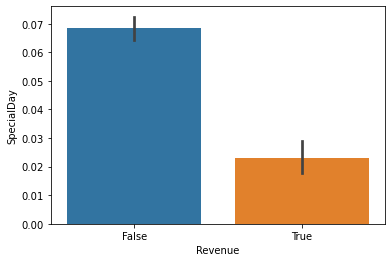

In [49]:
sns.barplot(x = df['Revenue'],
           y = df['SpecialDay'])

- special day **0.0** contributed more to revenue when compared with other special days.
- most of the special days dosen't contribute to the revenue as expected.

### Generate a binary feature indicating whether the user visited all three page categories

In [51]:
cat_mask = (df['Administrative']!= 0) & (df['Informational']!= 0) & (df['ProductRelated']!= 0)
"""
if user visited all three page categories then value is 1 if not 0
"""
df['visited_all_categories'] = np.where(cat_mask, 1, 0)

In [52]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,visited_all_categories
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0


### Explore PageValues distribution and its relationship with TrafficType, VisitorType, and Region.


### Relation between PageValues and Region  

In [53]:
#sum of pagevalues wrt Region
df[["PageValues", 'Region']].groupby('Region').sum('PageValues')

,PageValues
Region,
1,28212.256912
2,6709.893181
3,12842.429647
4,6860.170650
5,2941.753454
6,3866.874528
7,4763.541048
8,1847.940453
9,4569.689575


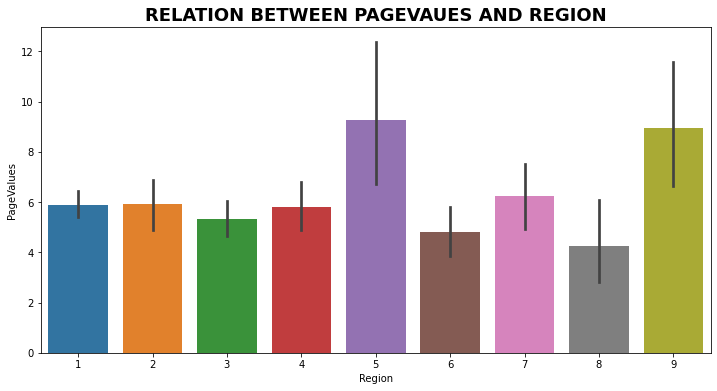

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x =df['Region'], y=df['PageValues'])
plt.title("RELATION BETWEEN PAGEVAUES AND REGION",fontsize=18, fontweight='bold' )
plt.show()

- Region **1** contributes more to revenue due to its high pagevalue of **28212.256912**.
- Both Region **5** and **9** has high frequency of pagevalue but there contribution is less when compared with Region **1**

### Relation between PageValues and TrafficType  

In [55]:
df[["PageValues",'TrafficType']].groupby('TrafficType').sum('PageValues')

,PageValues
TrafficType,
1,8468.386672
2,32494.983720
3,6722.420075
4,7529.087303
5,2005.247088
6,2253.852296
7,542.693810
8,3533.735395
9,160.379441


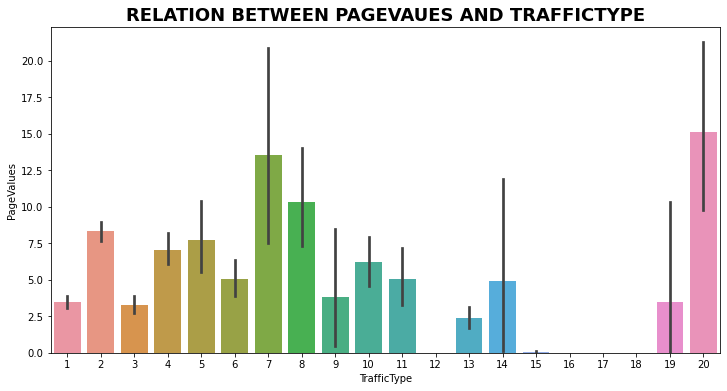

In [56]:
plt.figure(figsize=(12,6))
sns.barplot(x =df['TrafficType'], y=df['PageValues'])
plt.title("RELATION BETWEEN PAGEVAUES AND TRAFFICTYPE",fontsize=18, fontweight='bold' )
plt.show()

- PageValue of **32494.983720** id coming from Traffictype of **2**
- Both Traffictype **7** and **20** has high frequency of pagevalue but there contribution is less.
- There is no Pagevalue frequency from Traffictype of **12,16,17,18** and negligable pagevalue count with traffictpe **15**.

### Relation between PageValues and VisitorType

In [57]:
df[["PageValues",'VisitorType']].groupby('VisitorType').sum('PageValues')

,PageValues
VisitorType,
New_Visitor,18248.085596
Other,1546.304039
Returning_Visitor,52820.159812


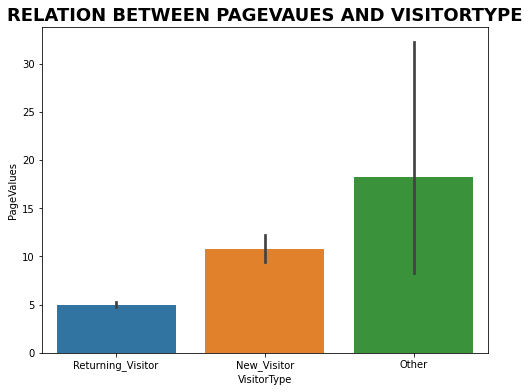

In [58]:
plt.figure(figsize=(8,6))
sns.barplot(x =df['VisitorType'], y=df['PageValues'])
plt.title("RELATION BETWEEN PAGEVAUES AND VISITORTYPE",fontsize=18, fontweight='bold' )
plt.show()

- **Returning_Visitor** contributes more to revenue with pagevalue of **52820.159812**
- The other type of visitor has more frequency in pagevalues

### - Investigate user session lengths and their impact on conversion rates.


### Group users based on VisitorType, OperatingSystems, and Region to identify potential differences in behavior and conversion rates.

In [61]:
#grouping based on VisitorType
samp = df[["VisitorType", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]].groupby("VisitorType").agg(['sum','mean'])
samp

Administrative_Duration            Informational_Duration  \
                                      sum       mean                    sum   
VisitorType                                                                   
New_Visitor                 155697.766959  91.911315           32588.278334   
Other                         5329.125000  62.695588             993.266667   
Returning_Visitor           835466.575991  79.183639          391463.121448   

                             ProductRelated_Duration               
                        mean                     sum         mean  
VisitorType                                                        
New_Visitor        19.237472            1.078050e+06   636.393354  
Other              11.685490            4.848441e+04   570.404862  
Returning_Visitor  37.101992            1.360469e+07  1289.421490

<AxesSubplot:xlabel='VisitorType'>

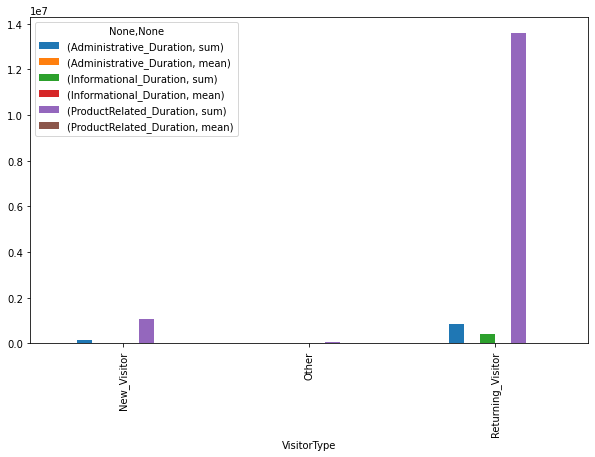

In [71]:
samp.plot(kind = 'bar',  figsize= (10,6))

- Returning visitor spends most of the time Product related pages when compared with rest of the pages

In [74]:
#grouping based on OperatingSystems
samp = df[["OperatingSystems", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]].groupby("OperatingSystems").agg(['sum','mean'])
samp

Administrative_Duration             Informational_Duration  \
                                     sum        mean                    sum   
OperatingSystems                                                              
1                          221700.949226   85.764390           79594.820118   
2                          505883.591461   76.637417          247373.333788   
3                          232314.926195   90.925607           85216.387543   
4                           29239.503845   61.170510           10915.958333   
5                             147.333333   24.555556              13.000000   
6                            1353.738889   71.249415             711.200000   
7                            1084.633333  154.947619              96.700000   
8                            4768.791667   60.364451            1123.266667   

                            ProductRelated_Duration               
                       mean                     sum         mean  
OperatingSystems                                                  
1                 30.791033            2.241089e+06   866.959015  
2                 37.475130            9.317266e+06  1411.493149  
3                 33.352794            2.478812e+06   970.180732  
4                 22.836733            6.129379e+05  1282.296851  
5                  2.166667            4.934433e+03   822.405516  
6                 37.431579            1.918366e+04  1009.666147  
7                 13.814286            6.372487e+03   910.355336  
8                 14.218565            5.062532e+04   640.826846

<AxesSubplot:xlabel='OperatingSystems'>

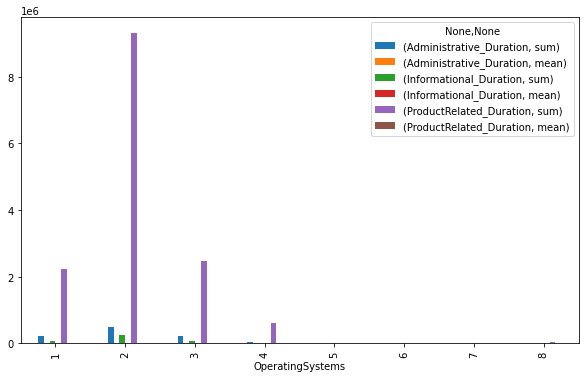

In [75]:
samp.plot(kind = 'bar',  figsize= (10,6))

- prodcut related pages are mostly visited through type 2 Operaating system

In [77]:
#grouping based on Region
samp = df[["Region", "Administrative_Duration", "Informational_Duration", "ProductRelated_Duration"]].groupby("Region").agg(['sum','mean'])
samp

Administrative_Duration            Informational_Duration             \
                           sum       mean                    sum       mean   
Region                                                                        
1                380717.241113  79.647958          178200.092263  37.280354   
2                 98697.580050  86.881673           40898.543413  36.002239   
3                199534.743928  83.035682           84565.728359  35.191730   
4                 98157.161594  83.043284           42943.418333  36.331149   
5                 28046.483999  88.196491            9963.731904  31.332490   
6                 55216.176134  68.591523           24075.708248  29.907712   
7                 59945.436475  78.771927           20210.950833  26.558411   
8                 38878.399309  89.581565           14248.146667  32.829831   
9                 37300.245348  72.994609            9938.346429  19.448819   

       ProductRelated_Duration               
                           sum         mean  
Region                                       
1                 6.099793e+06  1276.107354  
2                 1.343258e+06  1182.445068  
3                 2.855745e+06  1188.408424  
4                 1.316269e+06  1113.594595  
5                 3.649886e+05  1147.762954  
6                 8.333658e+05  1035.237000  
7                 8.694338e+05  1142.488546  
8                 4.755703e+05  1095.784162  
9                 5.727974e+05  1120.934196

<AxesSubplot:xlabel='Region'>

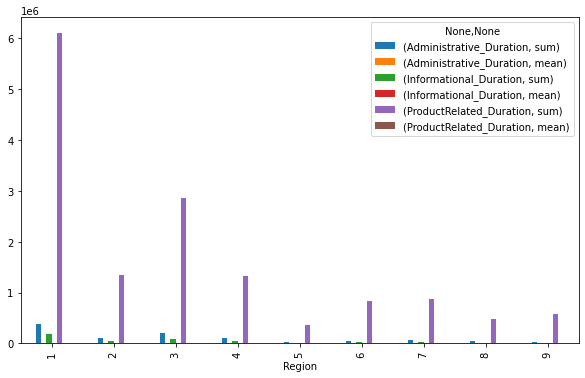

In [78]:
samp.plot(kind = 'bar',  figsize= (10,6))

- Region 1 users spends more time in product related pages

In [79]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue', 'visited_all_categories'],
      dtype='object')

<AxesSubplot:xlabel='ExitRates', ylabel='BounceRates'>

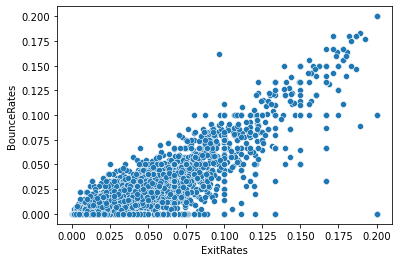

In [81]:
sns.scatterplot(y = df['BounceRates'], x = df['ExitRates'])